# `Distributions` and Related Packages
## Weighted Vectors
- In the case of discrete distributions o finite support, the `StatsBase` package provides the "weight vector" object via `Weights()`, which allows for an array of values, or outcomes, to be given probabilistic weights. This is also known as ***probability vector***.

In [1]:
using StatsBase, Random
Random.seed!(1)

grade = ["A","B","C","D","E"]
weightVect = Weights([0.1,0.2,0.1,0.2,0.4])

N = 10^6
data = sample(grade,weightVect, N)
[count(i -> i==g, data) for g in grade]./N

5-element Vector{Float64}:
 0.099901
 0.200248
 0.099704
 0.20068
 0.399467

## Using Distributions Type Objects
- Consider a distribution from the "Triangular" family, with the following density:
$$
f(x) = \left\{
\begin{array}{ll}
x & \text{for }x \in [0,1],\\
2-x & \text{for }x \in (1,2].
\end{array}
\right.
$$
- In the Julia code, we create a Distribution object by `TiangularDist()`
  - Get the PDF of one distribution: `pdf(::Distributions, ::Real)`
  - Get the CDF of one distribution: `cdf(::Distributions, ::Real)`
  - Get the inverse CDF of one distribution: `quantile(::Distributions, ::Real)`

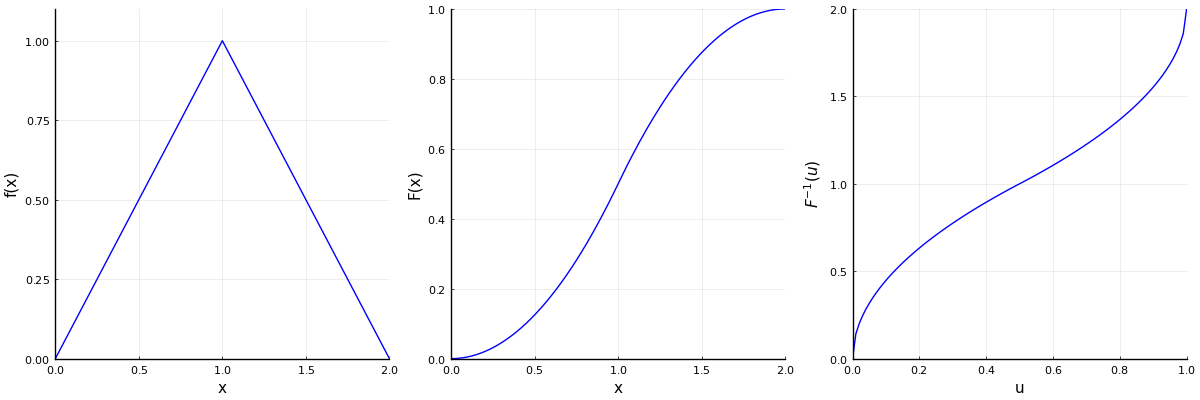

In [4]:
using Distributions, Plots, LaTeXStrings;pyplot()

dist = TriangularDist(0,2,1)
xGrid = 0:0.01:2
uGrid = 0:0.01:1

p1 = plot(xGrid, pdf.(dist, xGrid),c=:blue,
    xlims=(0,2), ylims=(0,1.1),
    xlabel="x", ylabel="f(x)")
p2 = plot(xGrid, cdf.(dist, xGrid), c=:blue,
    xlims=(0,2), ylims=(0,1),
    xlabel="x", ylabel="F(x)")
p3 = plot(uGrid, quantile.(dist, uGrid), c=:blue,
    xlims=(0,1), ylims=(0,2),
    xlabel="u", ylabel=L"F^{-1}(u)")

plot(p1,p2,p3, legend=:none, layout=(1,3), size=(1200,400))

In [11]:
supertype(TriangularDist)

Distribution{Univariate, Continuous}

- Get a variety of properties and parameters of Distribution objects.
  - `mean(::Distribution)`
  - `std(::Distribution)`
  - `var(::Distribution)`
  - `skewness(::Distribution)`
  - `kurtosis(::Distribution)`
  - `minimum(::Distribution)`
  - `maximum(::Distribution)`
  - `mode(::Distribution)` or `modes(::Distribution)` to get a single mode (value of $x$ where the PMF or PDF is maximized) or an array of modes where applicable.

In [28]:
using Distributions
dist = TriangularDist(0,2,1)

println("Parameters: \t\t\t", params(dist))
println("Central descriptors: \t\t", mean(dist),"\t", median(dist))
println("Dispersion descriptors: \t", var(dist),"\t", std(dist))
println("Higher moment shape descriptors: ", skewness(dist),"\t", kurtosis(dist))
println("Range: \t\t\t\t", minimum(dist),"\t", maximum(dist))
println("Mode: \t\t\t\t", mode(dist), "\tModes:", modes(dist))

Parameters: 			(0.0, 2.0, 1.0)
Central descriptors: 		1.0	1.0
Dispersion descriptors: 	0.16666666666666666	0.408248290463863
Higher moment shape descriptors: 0.0	-0.6
Range: 				0.0	2.0
Mode: 				1.0	Modes:[1.0]


- Generating random observations from a distribution-type object. `rand(::Distribution, ::Int)`

In [30]:
using Distributions, StatsBase, Random
Random.seed!(1)

dist1 = TriangularDist(0,10,5)
dist2 = DiscreteUniform(1,5)
theorMean1, theorMean2 = mean(dist1), mean(dist2)

N = 10^6
data1 = rand(dist1, N)
data2 = rand(dist2, N)
estMean1, estMean2 = mean(data1), mean(data2)

println("Symmetric Triangular Distribution on [0,10] has mean $theorMean1 (estimated: $estMean1)")
println("Discrete Uniform Distribution on {1,2,3,4,5} has mean $theorMean2 (estimated: $estMean2)")

Symmetric Triangular Distribution on [0,10] has mean 5.0 (estimated: 4.999164797766807)
Discrete Uniform Distribution on {1,2,3,4,5} has mean 3.0 (estimated: 2.999593)


## The Inverse Probabiltiy Transform
- Transforming pseudorandom numbers from a uniform distribution into numbers from a given distribution.
- ***Inverse probability transform***: Let $X$ be a random variable distributed with CDF $F(\cdot)$ and inverse CDF $F^{-1}(\cdot)$. Now take $U$ to be a uniform random variable over $[0,1]$, and let $Y = F^{-1}(U)$. It holds that $Y$ is distributed like $X$.
  - Consider a uniform random vairable $U$ and apply to it the inverse probability tansform $F^{-1}(\cdot)$. Consider the CDF of $Y=F^{-1}(U)$ and see that it is $F(\cdot)$ 
$$
F_{Y}(y) = \mathbb{P}(Y\le y) = \mathbb{P}(F^{-1}(U)\le y) = \mathbb{P}(U\le F(y)) = F_{U}(F(y)) = F(y)
$$
  - The third equality follows because $F(\cdot)$ is a monotonic function and can be applied to both sides of the inequality. The last step follows because the CDF of uniform $(0,1)$ random variable is
$$
F_{U}(z) = \left\{\begin{array}{ll}
0 & \text{for }z<0, \\
z & \text{for }0 \le z \le 1, \\
1 & \text{for }1<z.
\end{array}
\right.
$$

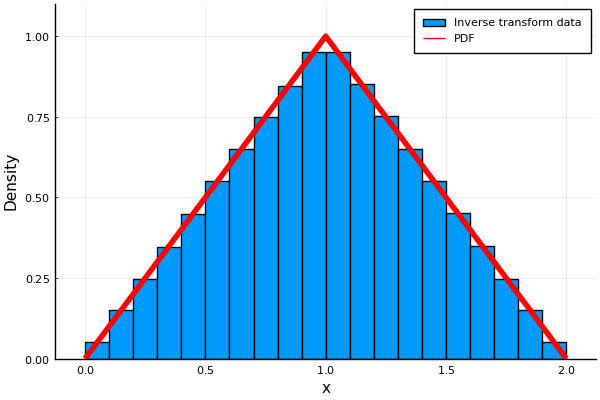

In [33]:
using Distributions, Plots; pyplot()

triangDist = TriangularDist(0,2,1)
xGrid = 0:0.1:2
N = 10^6
inverseSampledData = quantile.(triangDist, rand(N))

histogram(inverseSampledData, bins=30, normed=true, 
    ylims=(0,1.1), label="Inverse transform data")
plot!(xGrid, pdf.(triangDist,xGrid), c=:red, lw=4,
    xlabel="x", label="PDF", ylabel="Density", legend=:topright)